# Determining the probability of a crash of a vehicle under different conditions using Monte Carlo Simulation


# Introduction

Many lives are lost and countless people are injured all around the world due to driving under the influence of alcohol or due to distracted driving because of cellphone usage. In 2018, there were 319,146 crashes involving motor vehicles in Illinois. Injury crashes accounted for 21.1% of these crashes (67,453), while fatal crashes (951) accounted for less than 1% of these crashes. There was an average of 1.1 deaths per fatal crash. 

As part of our project we are trying to simulate the number of crashes for an autonomous vehicles and comparing it to the number of crashes occuring due to driving under the influence of alcohol and distracted driving due to cellphone usage. 


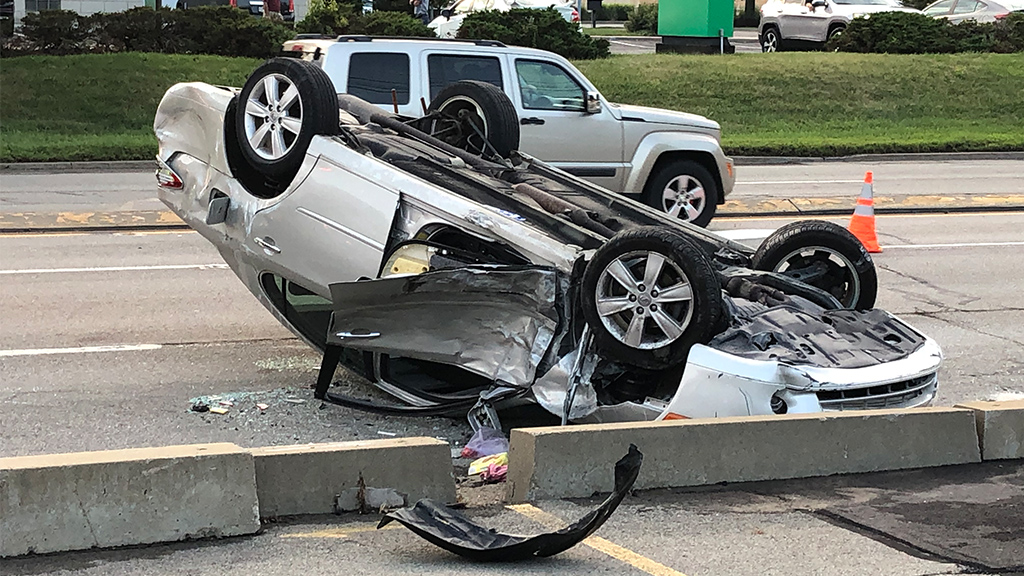

In [68]:
from IPython.display import Image
Image(filename='route-8-accident.jpg')

For our experiments, we are testing the following hypothesis:

**Hypothesis 1:**

The number of overall accidents decreases when people who consume alcohol travel only in autonomous vehicles (Do not drive cars).

**Hypothesis 2:**

The number of overall accidents decreases when people can use cell phones only in Autonomous vehicles. (Do not use cell phones and drive cars)

We are keeping the following variables constant:
Number of Turns, Speed Limit, Country (Driving Rules), Time of Day

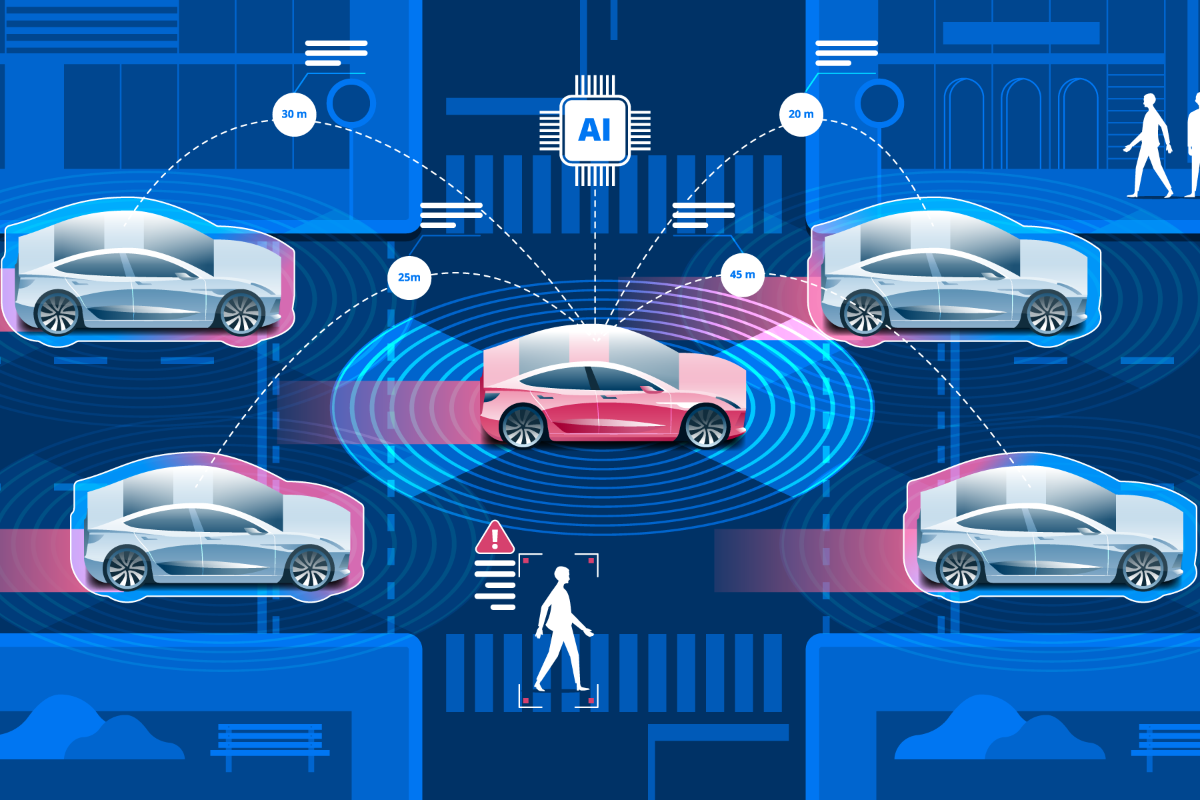

In [69]:

Image(filename='Autonomous-vehicle-AdobeStock_174958313_rm.png')


In [31]:
import random
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
random.seed(10)

# Initialize Map Function

As part of the initialize map function we have used a Network DiGraph as our principle data structure. The edges the represent the following attributes types of routes, the amount of traffic, number of cars with the hypothesis parameter. For example, cars in which drivers are under influence of alcohol or are distracted driving or cars which are autonomous. 

In [37]:
def initializemap(hypothesis):
  d = nx.DiGraph()
  #d = add_counties(d)
  d = create_map(d,hypothesis)
  return d

# Create Map Function

The function is to create an if else ladder for iterating through different types of hypothesis parameters 'alcohol', 'distraction' and 'autonomous'. The function returns a network graph with the hypothesis multiplier value depending upon the hypothesis. There h_multiplier multiplies with the number of cars. The multiplier for alcohol is 10 and with distraction is 15 because according to statistics obtained from 'Illinois Department of Transportation' and 'Illinois Tollway' and a few assumptions made for autonomous vehicles to reach a conclusion. 

In [32]:
def create_map(d, hypothesis):
    if hypothesis == "alcohol":
        h_multiplier = 10
    elif hypothesis == "distraction":
        h_multiplier = 15
    elif hypothesis == "autonomous":
        h_multiplier = 0
    d = add_routes(d,h_multiplier)
    return d

# Add Routes Function

As part of this function we are adding three types of routes 'State', 'Interstate' and 'City' roads.
The roads are the edges of a network graph and attributes are being assigned to it. 
Each road is being assigned a random number of cars in a specified range for each type of road.
Each road is also being assigned a random number of people who are satisfying the hypothesis for a particular experiment i.e. assigning people who have consumed alcohol or are distracted while driving.


In [36]:
def add_routes(d,h_multiplier):
    random.seed(10)
    counties = ['Adams', 'Alexander', 'Bond', 'Boone', 'Brown', 'Bureau', 'Calhoun', 'Carroll', 'Cass', 'Champaign',
                'Christian', 'Clark', 'Clay', 'Clinton', 'Coles', 'Cook', 'Crawford', 'Cumberland', 'DeKalb', 'De Witt',
                'Douglas', 'Dupage',
                'Edgar', 'Edwards', 'Effingham',
                'Fayette', 'Ford', 'Franklin', 'Fulton', 'Gallatin', 'Greene', 'Grundy', 'Hamilton', 'Hancock',
                'Hardin', 'Henderson', 'Henry', 'Iroquois', 'Jackson',
                'Jasper', 'Jefferson', 'Jersey', 'Jo Daviess', 'Johnson', 'Kane', 'Kankakee', 'Kendall', 'Knox', 'Lake',
                'LaSalle', 'Lawrence', 'Lee', 'Livingston', 'Logan',
                'Macon', 'Macoupin', 'Madison', 'Marion', 'Marshall', 'Mason', 'Massac', 'McDonough', 'McHenry',
                'McLean', 'Menard', 'Mercer', 'Monroe', 'Montgomery', 'Morgan',
                'Moultrie', 'Ogle', 'Peoria', 'Perry', 'Piatt', 'Pike', 'Pope', 'Pulaski', 'Putnam', 'Randolph',
                'Richland', 'Rock Island', 'Saline', 'Sangamon', 'Schuyler',
                'Scott', 'Shelby', 'St. Clair', 'Stark', 'Stephenson', 'Tazewell', 'Union', 'Vermilion', 'Wabash',
                'Warren', 'Washington', 'Wayne', 'White', 'Whiteside', 'Will',
                'Williamson', 'Winnebago', 'Woodford']
    counties = counties[:42]
    for i in range(1, len(counties)):
        car_stat = assign_traffic(h_multiplier,"State")
        distance = random.uniform(15, 25)
        d.add_edge(counties[i], counties[i - 1], weight=distance, type="State", car_stat=car_stat)
        d.add_edge(counties[i - 1], counties[i], weight=distance, type="State", car_stat=car_stat)
    distance = random.uniform(15, 25)
    car_stat = assign_traffic(h_multiplier,"State")
    d.add_edge(counties[0], counties[i], weight=distance, type="State", car_stat=car_stat)
    d.add_edge(counties[i], counties[0], weight=distance, type="State", car_stat=car_stat)

    # InterState Roads
    for i in range(1, 10):
        distance = random.uniform(75, 100)
        car_stat = assign_traffic(h_multiplier, "InterState")
        d.add_edge(counties[i * 3], counties[i * 3 - 3], weight=distance, type="InterState",car_stat=car_stat)
        d.add_edge(counties[(i * 3) - 3], counties[(i * 3)], weight=distance, type="InterState",car_stat=car_stat)

    for i in range(1, 9):
        distance = random.uniform(100, 125)
        car_stat = assign_traffic(h_multiplier, "InterState")
        d.add_edge(counties[i * 4], counties[(i * 4) - 4], weight=distance, type="InterState", car_stat=car_stat)
        d.add_edge(counties[(i * 4) - 4], counties[(i * 4)], weight=distance, type="InterState", car_stat=car_stat)

    # City Roads
    for i in range(1, 7):
        distance = random.uniform(100, 125)
        car_stat = assign_traffic(h_multiplier, "City")
        d.add_edge(counties[i * 5], counties[(i * 5) - 5 - i], weight=distance, type="city", car_stat=car_stat)
        d.add_edge(counties[(i * 5) - 5 - i], counties[(i * 5)], weight=distance, type="city", car_stat=car_stat)
    for i in range(1, 6):
        distance = random.uniform(150, 175)
        car_stat = assign_traffic(h_multiplier, "City")
        d.add_edge(counties[i * 6], counties[(i * 6) - 6 - i], weight=distance, type="city", car_stat=car_stat)
        d.add_edge(counties[(i * 6) - 6 - i], counties[(i * 6)], weight=distance, type="city", car_stat=car_stat)
    return d

# Displaying the Created Route 

In this function we are displaying the networkx graph created.

In [40]:
def route_display(d):
    my_pos = nx.spring_layout(d, seed=50)
    edge_color = []
    mapdict = (nx.get_edge_attributes(d, "type"))
    for key in mapdict:
        if mapdict[key] == "InterState":
            edge_color.append("green")
        elif mapdict[key] == "city":
            edge_color.append("orange")
        else:
            edge_color.append("blue")
    nx.draw(d, pos=my_pos, with_labels=True, node_color='red', node_size=400, edge_color=edge_color, linewidths=1,
            font_size=15)
    plt.show()

# Assign Traffic Function 
As part of this function, we assign traffic to each type of route and the number of cars satisfying the hypothesis parameter.
For an InterState Type Road we have assumed the maximum traffic, followed by State Type Road and City Roads.


In [55]:
def assign_traffic(h_multiplier, roadtype):
    car_stat = {}
    if h_multiplier == 0 and roadtype == "State":
        car_stat = {"h_param": 0,"autonomous":random.randint(10, 25), "no_of_cars": random.randint(100, 250)}
    elif roadtype == "State":
        car_stat = {"h_param": random.randint(0, h_multiplier),"autonomous":random.randint(10, 25), "no_of_cars": random.randint(100, 250)}
    elif h_multiplier == 0 and roadtype == "InterState":
        car_stat = {"h_param": 0, "autonomous":random.randint(10, 25), "no_of_cars": random.randint(150, 500)}
    elif roadtype == "InterState":
        car_stat = {"h_param": random.randint(h_multiplier - 5, h_multiplier * 3), "autonomous":random.randint(10, 25), "no_of_cars": random.randint(150, 500)}
    elif h_multiplier == 0 and roadtype == "City":
        car_stat = {"h_param": 0, "autonomous":random.randint(10, 25), "no_of_cars": random.randint(50, 200)}
    else:
        car_stat = {"h_param": random.randint(0, h_multiplier - 5), "autonomous":random.randint(10, 25), "no_of_cars": random.randint(50, 200)}
    return car_stat

# Calculating the Accidents Per Edge

In this function we calculate the accidents happening per edge or per route depending upon the type of hypothesis.
The formula is based upon facts and figures obtained from 'Illinois Department of Transportation' and 'Illinois Tollway' and a few assumptions made for autonomous vehicles to reach the conclusion for the hypothesis. 

In [38]:
def accidents_per_edge(edgestat,hypothesis):
    if hypothesis == "alcohol":
        return (np.random.binomial(edgestat[next(iter(edgestat))], 0.033) + np.random.binomial(edgestat['autonomous'],0.02) + np.random.binomial(edgestat['no_of_cars'] - edgestat['autonomous'] - edgestat[next(iter(edgestat))], 0.03))
    elif hypothesis == "distraction":
        return (np.random.binomial(edgestat[next(iter(edgestat))], 0.0324) + np.random.binomial(edgestat['autonomous'],0.02) + np.random.binomial(edgestat['no_of_cars'] - edgestat['autonomous'] - edgestat[next(iter(edgestat))], 0.03))
    else:
        return (np.random.binomial(edgestat['autonomous'],0.02) + np.random.binomial(edgestat['no_of_cars'] - edgestat['autonomous'], 0.03))

# Calculating and Storing the Accidents happening per road type

In this function we have calculated and stored the total number of accidents happening per road type in a dictionary called cumulative_stat.

In [39]:
def accidents_per_roadtype(d,hypothesis):
  cumulative_stat = {'State': 0,'InterState': 0 , 'City': 0}
  for i in range(0,len(d.edges(data=True))):
    if list(d.edges(data=True))[i][2]['type'] == 'State':
      cumulative_stat['State'] += accidents_per_edge((list(d.edges(data=True))[i])[2]['car_stat'],hypothesis)
    elif list(d.edges(data=True))[i][2]['type'] == 'InterState':
      cumulative_stat['InterState'] += accidents_per_edge((list(d.edges(data=True))[i])[2]['car_stat'],hypothesis)
    else:
      cumulative_stat['City'] += accidents_per_edge((list(d.edges(data=True))[i])[2]['car_stat'],hypothesis)
  return(cumulative_stat)

# Run Experiment Function
The run experiment function runs the hypothesis for a specific time period '182' represents the number of days for which the experiment is running. These 182 results are stored in a pandas dataframe in the columns 'State', Interstate' and 'City'. 
The functions helps to calculate the minimum value, maximum value, median and mean of the dataframe

In [72]:
def run_experiment(hypothesis):
    data = {}
    df_final = pd.DataFrame(columns=['State', 'InterState', 'City'])

    for i in range(182):
        d = initializemap(hypothesis)
        data = accidents_per_roadtype(d, hypothesis)
        df = pd.DataFrame([data], columns=data.keys())
        df_final = pd.concat([df_final, df])

    hypothesis_stats = df_final.agg(
        {'State': ['min', 'max', 'median', 'mean'], 'InterState': ['min', 'max', 'median', 'mean'],
         'City': ['min', 'max', 'median', 'mean']})

    df_final['Total'] = df_final['State'] + df_final['InterState'] + df_final['City']
    print(df_final)
    print(hypothesis_stats)
    df_final.iloc[0:0]
    
    return list(df_final['Total'])

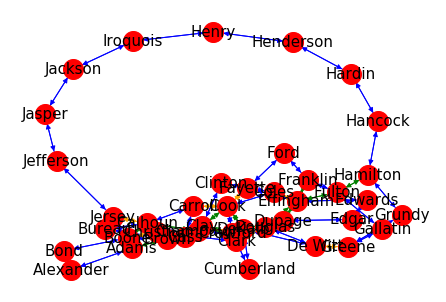

In [70]:
route_display(d)

In [78]:
# Main Function
if __name__ == "__main__":
    no_of_days = list(range(1,len(autonomous)+1))
    print("Accidents on State,Interstate and City due to Alcohol:")
    alcohol = run_experiment("alcohol")

    print("Accidents on State,Interstate and City due to Distraction of Cellphones:")
    distraction = run_experiment("distraction")

    print("Accidents on State,Interstate and City during Experiment without Alcohol or Cellphones:")
    autonomous = run_experiment("autonomous")

   

Accidents on State,Interstate and City due to Alcohol:
   State InterState City Total
0    416        368   61   845
0    461        368   68   897
0    423        342   76   841
0    447        349   67   863
0    414        356   75   845
..   ...        ...  ...   ...
0    463        362   76   901
0    429        310   74   813
0    456        338   67   861
0    447        382   60   889
0    415        370   62   847

[182 rows x 4 columns]
             State  InterState       City
min     390.000000  292.000000  53.000000
max     512.000000  408.000000  89.000000
median  439.000000  349.000000  70.000000
mean    438.840659  350.708791  69.456044
Accidents on State,Interstate and City due to Distraction of Cellphones:
   State InterState City Total
0    445        352   52   849
0    449        340   63   852
0    474        347   58   879
0    449        345   62   856
0    444        338   61   843
..   ...        ...  ...   ...
0    473        341   54   868
0    469        34

# Final Dataframe

In [80]:
df1 = pd.DataFrame()
df1['No_Of_Days']=no_of_days
df1['Alcohol']=alcohol
df1['Distraction']=distraction
df1['Experiment']=autonomous
df1

,No_Of_Days,Alcohol,Distraction,Experiment
0,1,845,849,859
1,2,897,852,831
2,3,841,879,814
3,4,863,856,849
4,5,845,843,819
...,...,...,...,...
177,178,901,868,797
178,179,813,871,751
179,180,861,849,823
180,181,889,794,824


# Plot for crash with respect to alcohol, distraction and autonomous

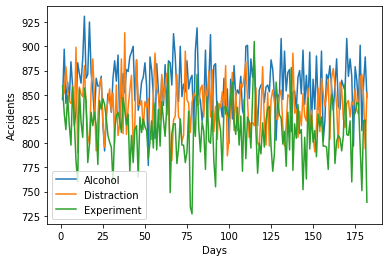

In [81]:
plt.plot(no_of_days,alcohol, label = "Alcohol")
plt.plot(no_of_days, distraction,label = "Distraction")
plt.plot(no_of_days, autonomous , label = "Experiment")
plt.xlabel("Days")
plt.ylabel("Accidents")
plt.legend()
plt.show()